In [1]:
from torch.utils.data import DataLoader
from warnings import simplefilter
import matplotlib.pyplot as plt
from ANN.dataloader import *
from ANN.Trainer import *
import pandas as pd
import numpy as np
from ANN.ANN_Models import *
import torch

simplefilter(action='ignore', category=pd.errors.ParserWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)

In [31]:
stdoftruths = 1/DATA().Ytrain.std().to_numpy()
stdoftruths

array([2.03868102])

In [38]:
store_loss = np.genfromtxt("ANN\\old_loss\\store_loss.csv", delimiter=',')
store_loss /= stdoftruths
store_loss

array([[0.00112   , 0.00366873, 0.00811803, 0.01535448, 0.02470084,
        0.03313341, 0.03815282, 0.04735724, 0.04941498, 0.04650908,
        0.04938585, 0.0499635 , 0.04841339, 0.05248063, 0.05893731],
       [0.00015027, 0.00118959, 0.00125177, 0.00193443, 0.00210334,
        0.002108  , 0.00245335, 0.00249267, 0.00188804, 0.00244075,
        0.00242867, 0.0032123 , 0.0038476 , 0.0044531 , 0.00375923],
       [0.00021929, 0.00023456, 0.00028048, 0.00026062, 0.00028666,
        0.00026577, 0.00026717, 0.00027852, 0.00025603, 0.00026748,
        0.00024673, 0.00029878, 0.00025969, 0.00026471, 0.00030768],
       [0.00022991, 0.00039978, 0.00076387, 0.00093166, 0.00068939,
        0.00074832, 0.00076104, 0.00064309, 0.00071985, 0.00062313,
        0.0007433 , 0.0006569 , 0.00062425, 0.00066285, 0.00066765],
       [0.0002344 , 0.00048243, 0.00147162, 0.00166362, 0.00115594,
        0.00083216, 0.00125268, 0.0014135 , 0.00126732, 0.00119401,
        0.001362  , 0.0012406 , 0.00116671, 

In [ ]:
# Used to check what the best na, nb values would be to train on
# lowest_loss = 100
# for na in range(15,16):
#     for nb in range(1,9):
#         print(na, nb)
#         data = DATA(na, nb) 
#         Xtrain, Ytrain = data.Xtrain, data.Ytrain
#         Xval, Yval = data.Xval, data.Yval

#         # Load data and set them up correctly for dataloader
#         Dataset_train, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.9, 0.1])
#         Dataset_val = CustomDataset(Xval.to_numpy(), Yval.to_numpy())
#         #Dataset_test = CustomDataset(data.testsub.u.to_numpy(), data.testsub.th.to_numpy())

#         dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
#         dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=False)
#         dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)
#         model = NARX(5)

#         train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NARX')

#         loss = train_module.fit(epochs=10, batch_size=32, save_log=False)
#         if loss < lowest_loss:
#             lowest_loss = loss
#             best_na = na
#             best_nb = nb
#         store_loss[na, nb-1] = loss

In [39]:
import seaborn as sns

In [40]:
min_val = 1
for i in range(store_loss.shape[0]):
    for j in range(store_loss.shape[1]):
        if min_val > store_loss[i,j]:
            min_val = store_loss[i,j]
            best_ij = (i,j)
print(f"best i,j is {best_ij}, with value {min_val}")

best i,j is (9, 0), with value 0.00013974647884271992


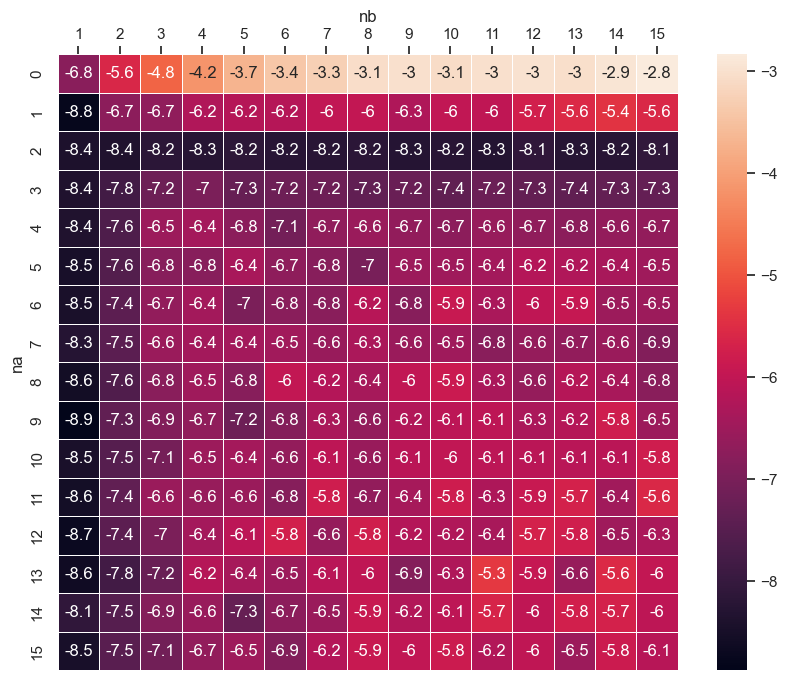

In [41]:
sns.set(rc={'figure.figsize': (10, 8)})
ax = sns.heatmap(np.log(store_loss), annot=True, linewidths=.5)
ax.set(xlabel='nb', ylabel='na')
ax.set_xticklabels(np.arange(1, 16))
#ax.set_title('Log of Loss for different na and nb values')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')


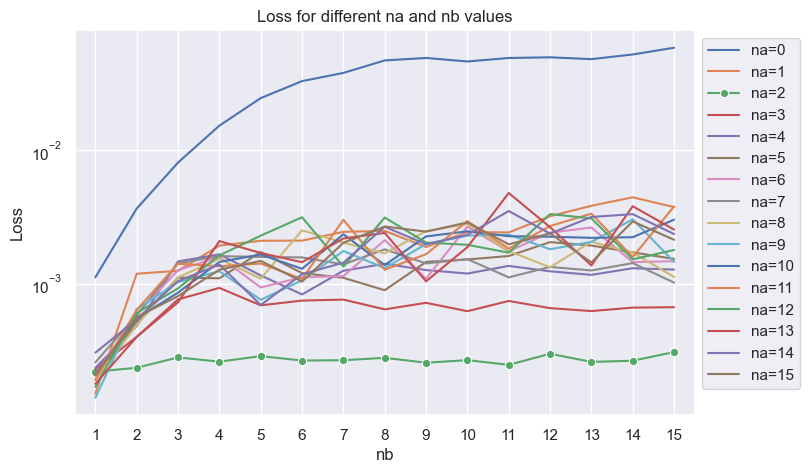

In [47]:
sns.set(rc={'figure.figsize': (8, 5)})
x = np.arange(1, 16)
sns.lineplot(x=x, y=store_loss[0, :], label='na=0')
sns.lineplot(x=x, y=store_loss[1, :], label='na=1')
sns.lineplot(x=x, y=store_loss[2, :], label='na=2', marker='o')
sns.lineplot(x=x, y=store_loss[3, :], label='na=3')
sns.lineplot(x=x, y=store_loss[4, :], label='na=4')
sns.lineplot(x=x, y=store_loss[5, :], label='na=5')
sns.lineplot(x=x, y=store_loss[6, :], label='na=6')
sns.lineplot(x=x, y=store_loss[7, :], label='na=7')
sns.lineplot(x=x, y=store_loss[8, :], label='na=8')
sns.lineplot(x=x, y=store_loss[9, :], label='na=9')
sns.lineplot(x=x, y=store_loss[10, :], label='na=10')
sns.lineplot(x=x, y=store_loss[11, :], label='na=11')
sns.lineplot(x=x, y=store_loss[12, :], label='na=12')
sns.lineplot(x=x, y=store_loss[13, :], label='na=13')
sns.lineplot(x=x, y=store_loss[14, :], label='na=14')
sns.lineplot(x=x, y=store_loss[15, :], label='na=15')
plt.yscale('log')
plt.xlabel('nb')
plt.ylabel('Loss')
plt.title('Loss for different na and nb values')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(1, 16))
plt.xlim(0.5, 15.5)
plt.show()

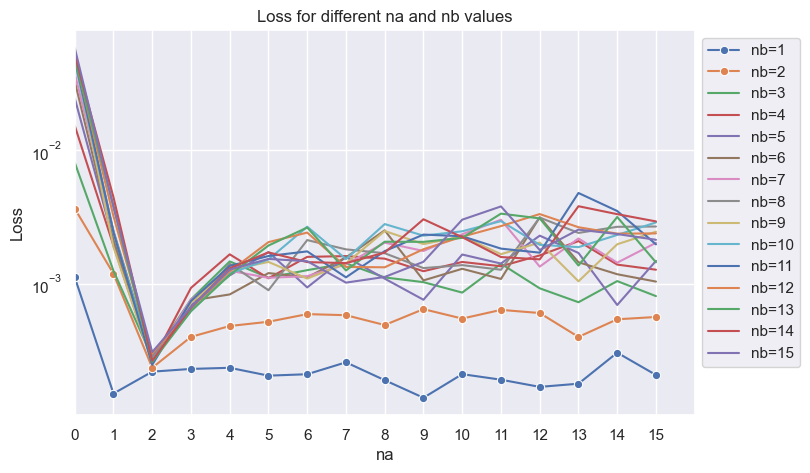

In [45]:
x = np.arange(0, 16)
sns.lineplot(x=x, y=store_loss[:, 0], label='nb=1', marker='o')
sns.lineplot(x=x, y=store_loss[:, 1], label='nb=2', marker='o')
sns.lineplot(x=x, y=store_loss[:, 2], label='nb=3')
sns.lineplot(x=x, y=store_loss[:, 3], label='nb=4')
sns.lineplot(x=x, y=store_loss[:, 4], label='nb=5')
sns.lineplot(x=x, y=store_loss[:, 5], label='nb=6')
sns.lineplot(x=x, y=store_loss[:, 6], label='nb=7')
sns.lineplot(x=x, y=store_loss[:, 7], label='nb=8')
sns.lineplot(x=x, y=store_loss[:, 8], label='nb=9')
sns.lineplot(x=x, y=store_loss[:, 9], label='nb=10')
sns.lineplot(x=x, y=store_loss[:, 10], label='nb=11')
sns.lineplot(x=x, y=store_loss[:, 11], label='nb=12')
sns.lineplot(x=x, y=store_loss[:, 12], label='nb=13')
sns.lineplot(x=x, y=store_loss[:, 13], label='nb=14')
sns.lineplot(x=x, y=store_loss[:, 14], label='nb=15')
plt.xlabel('na')
plt.ylabel('Loss')
plt.title('Loss for different na and nb values')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(0, 16))
plt.xlim(0, 16)
plt.yscale('log')
plt.show()


From this we can say that the optimal lies with nb = 2, and na 10

## Optimize size of network

In [49]:
store_loss2_depth = np.genfromtxt("ANN/old_loss//store_loss2.csv", delimiter=',')
store = np.genfromtxt("ANN/old_loss//store_loss2_withError.csv", delimiter=',')

In [52]:
store /= stdoftruths
store_loss2_depth /= stdoftruths

In [53]:
# data = DATA(2, 1) 
# Xtrain, Ytrain = data.Xtrain, data.Ytrain
# Xval, Yval = data.Xval, data.Yval

# additional_loss=[]

# # Load data and set them up correctly for dataloader
# Dataset_train, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.9, 0.1])
# Dataset_val = CustomDataset(Xval.to_numpy(), Yval.to_numpy())
# #Dataset_test = CustomDataset(data.testsub.u.to_numpy(), data.testsub.th.to_numpy())

# dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
# dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=False)
# dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)

# for i in range(4):
#     model = NARX(5)
#     train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NARX')

#     loss = train_module.fit(epochs=10, batch_size=32, save_log=False)
#     additional_loss.append(loss)

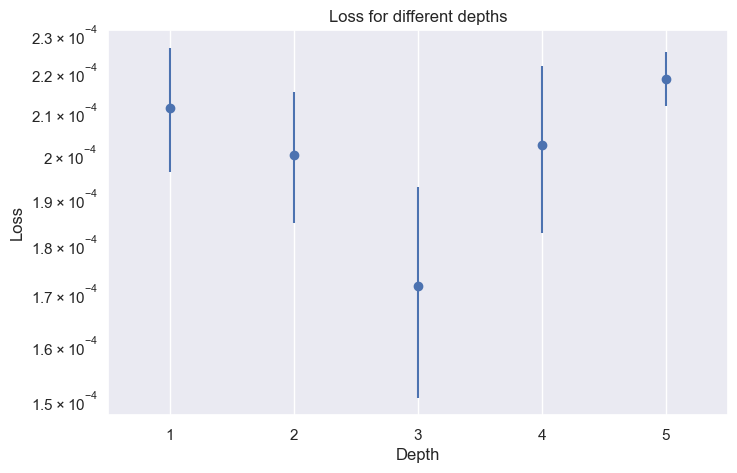

In [54]:
plt.errorbar(x=np.arange(1, 6), y=store[:,0], yerr=store[:,1], fmt='o')
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('Loss')
plt.title('Loss for different depths')
plt.xticks(np.arange(1, 6))
plt.xlim(0.5, 5.5)
plt.show()


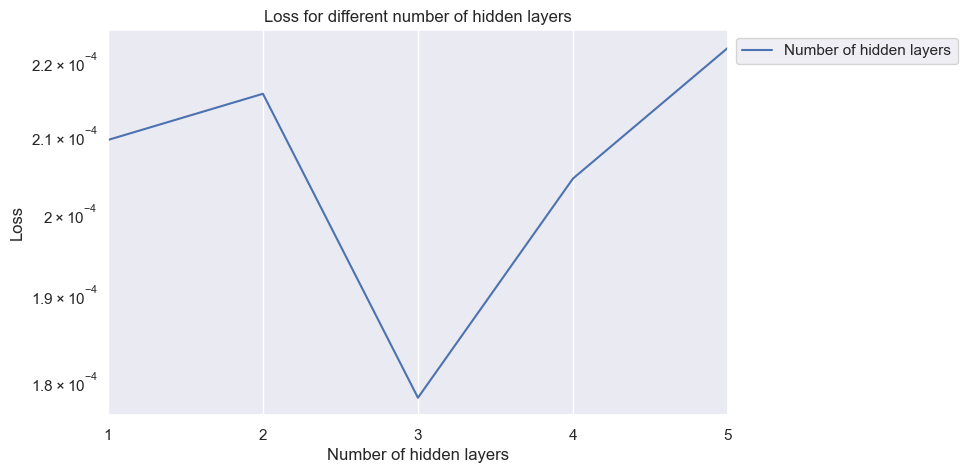

In [55]:
sns.lineplot(x=[1,2,3,4,5], y=store_loss2_depth, label='Number of hidden layers')
plt.ylabel('Loss')
plt.title('Loss for different number of hidden layers')
plt.xlabel('Number of hidden layers')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(1, 6))
plt.xlim(1, 5)
plt.yscale('log')


Since it seems that the number loss increases for layers after 4, I decide to use only 4

In [56]:
store_loss3_outfeatures = np.genfromtxt("ANN/old_loss//store_loss3.csv", delimiter=',')
store_loss3_outfeatures2 = np.genfromtxt("ANN/old_loss//store_loss3_withError.csv", delimiter=',')

In [60]:
store_loss3_outfeatures /= stdoftruths
store_loss3_outfeatures2 /= stdoftruths

In [61]:
# data = DATA(2, 1) 
# Xtrain, Ytrain = data.Xtrain, data.Ytrain
# Xval, Yval = data.Xval, data.Yval

# # Load data and set them up correctly for dataloader
# Dataset_train, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.9, 0.1])
# Dataset_val = CustomDataset(Xval.to_numpy(), Yval.to_numpy())
# #Dataset_test = CustomDataset(data.testsub.u.to_numpy(), data.testsub.th.to_numpy())

# dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
# dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=False)
# dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)

# for i in range(1,11):
#     model = NARX(i)

#     train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NARX')

#     loss = train_module.fit(epochs=10, batch_size=32, save_log=False)
#     store_loss3_outfeatures2[i-1, 4] = loss
#     np.savetxt("store_loss3_withError.csv", store_loss3_outfeatures2, delimiter=",")

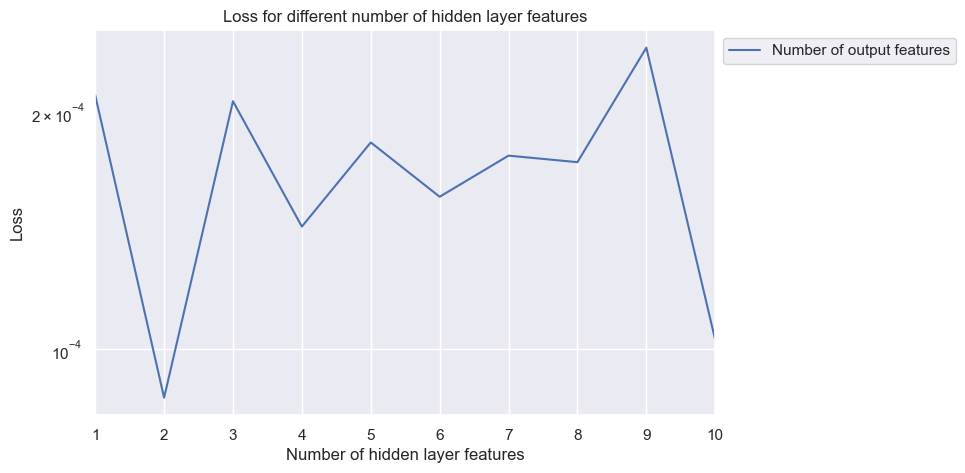

In [64]:
sns.lineplot(x=np.arange(1,11), y=store_loss3_outfeatures, label='Number of output features')
plt.ylabel('Loss')
plt.title('Loss for different number of hidden layer features')
plt.xlabel('Number of hidden layer features')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(1, 11))
plt.xlim(1, 10)
plt.yscale('log')
plt.show()

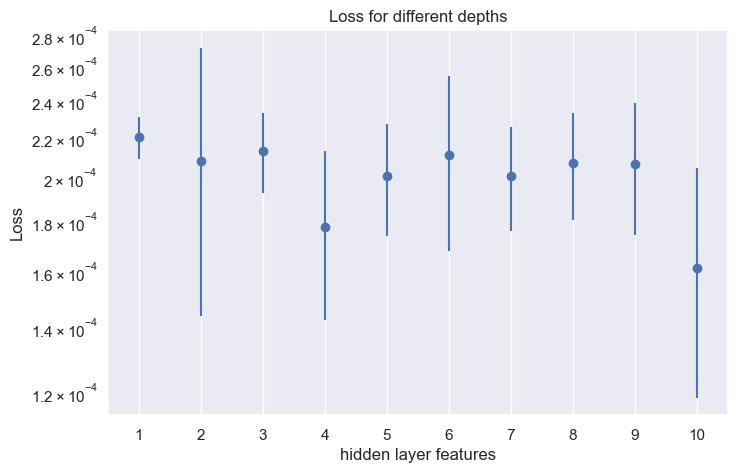

In [65]:
# store_loss3_outfeatures2 = np.genfromtxt("store_loss3_withError.csv", delimiter=',')
ym = np.mean(store_loss3_outfeatures2, axis=1)
ys = np.std(store_loss3_outfeatures2, axis=1)
plt.errorbar(x=np.arange(1, 11), y=ym, yerr=ys, fmt='o')
plt.yscale('log')
plt.xlabel('hidden layer features')
plt.ylabel('Loss')
plt.title('Loss for different depths')
plt.xticks(np.arange(1, 11))
plt.xlim(0.5, 10.5)
plt.show()


From this we find the optimal number of hidden layer nodes being 8. 
Note that this might not be the optimal solution to the problem.